### Description:
    

    * sku – Random ID for the product

    * national_inv – Current inventory level for the part

    * lead_time – Transit time for product (if available)

    * in_transit_qty – Amount of product in transit from source

    * forecast_3_month – Forecast sales for the next 3 months

    * forecast_6_month – Forecast sales for the next 6 months
    
    * forecast_9_month – Forecast sales for the next 9 months

    * sales_1_month – Sales quantity for the prior 1 month time period

    * sales_3_month – Sales quantity for the prior 3 month time period

    * sales_6_month – Sales quantity for the prior 6 month time period

    * sales_9_month – Sales quantity for the prior 9 month time period

    * min_bank – Minimum recommend amount to stock

    * potential_issue – Source issue for part identified

    * pieces_past_due – Parts overdue from source

    * perf_6_month_avg – Source performance for prior 6 month period

    * perf_12_month_avg – Source performance for prior 12 month period

    * local_bo_qty – Amount of stock orders overdue

    * deck_risk – Part risk flag

    * oe_constraint – Part risk flag

    * ppap_risk – Part risk flag

    * stop_auto_buy – Part risk flag

    * rev_stop – Part risk flag

    * went_on_backorder – Product actually went on backorder. This is the target value.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns" , 50)

In [2]:
df = pd.read_csv("train.csv")
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2,4,2,0,0,0,0,0,0,0,0,0,0,0,0.18,0.31,0,1,0,0,1,0,0
1,5,2,16,0,0,0,0,0,0,0,0,1,0,0,0.31,0.40,0,0,0,0,1,0,0
2,7,4,4,0,0,0,0,0,0,0,0,0,0,0,0.73,0.78,0,0,0,0,1,0,0
3,9,0,9,0,1,1,1,0,0,0,0,0,0,0,0.86,0.69,0,0,0,0,1,0,0
4,10,300,8,0,0,0,0,0,40,100,122,7,0,0,0.00,0.00,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58914,84165,11,8,0,0,0,0,2,6,17,26,6,0,0,0.54,0.64,0,1,0,0,1,0,0
58915,84166,0,8,0,4,5,7,2,3,4,5,0,0,0,0.76,0.77,0,0,0,0,1,0,1
58916,84167,0,2,0,1,1,1,0,0,0,0,0,0,0,0.09,0.06,0,0,0,0,1,0,1
58917,84169,6,4,0,0,0,0,0,0,0,0,0,0,0,0.77,0.80,0,1,0,0,1,0,0


In [3]:
df.shape

(58919, 23)

In [4]:
df.dtypes

sku                    int64
national_inv           int64
lead_time              int64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue        int64
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk              int64
oe_constraint          int64
ppap_risk              int64
stop_auto_buy          int64
rev_stop               int64
went_on_backorder      int64
dtype: object

## Data Pre-Processing

In [5]:
df.describe().T

## The 5 point summary is obtained which inlcudes: min,max,25,50 and 75 percentage

,count,mean,std,min,25%,50%,75%,max
sku,58919.0,42053.601249,24301.057174,2.0,21068.50,41948.00,63047.00,84171.0
national_inv,58919.0,199.403927,1529.148278,-401.0,3.00,11.00,54.00,75813.0
lead_time,58919.0,6.915698,3.522995,0.0,4.00,8.00,8.00,28.0
in_transit_qty,58919.0,17.140753,117.750387,0.0,0.00,0.00,0.00,3872.0
forecast_3_month,58919.0,87.252890,497.820231,0.0,0.00,0.00,12.00,15600.0
forecast_6_month,58919.0,162.178567,913.339877,0.0,0.00,0.00,26.00,29200.0
forecast_9_month,58919.0,237.743784,1345.784311,0.0,0.00,0.00,40.00,43000.0
sales_1_month,58919.0,25.505202,136.604848,0.0,0.00,0.00,6.00,4934.0
sales_3_month,58919.0,82.252991,430.185496,0.0,0.00,2.00,18.00,13554.0
sales_6_month,58919.0,163.349140,860.764496,0.0,0.00,4.00,35.00,26299.0


### Insights:
* As you can see "perf_6_month_avg" and "perf_12_month_avg" have -99 as a wrong placeholder.
* This could be basically undertood as wrong interpretation. Thus it could be treated as Nan and be removed as well. 

In [6]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

## Explaratory Data Analysis 

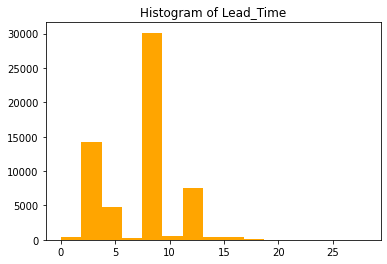

<Figure size 1440x1080 with 0 Axes>

In [7]:
## Lets take a closer look at lead time , perf_6_month_avg , perf_12_month_avg


plt.hist(x = df["lead_time"] , bins = 15,color = "orange")
plt.title('Histogram of Lead_Time')
plt.figure(figsize=(20,15))
plt.show()

## Insights: 

    * The distribution of lead times is right skewed. 
    * Most lead times fall in the range 0-20. 
    * The Samples with missing lead times will be close to the median lead time.

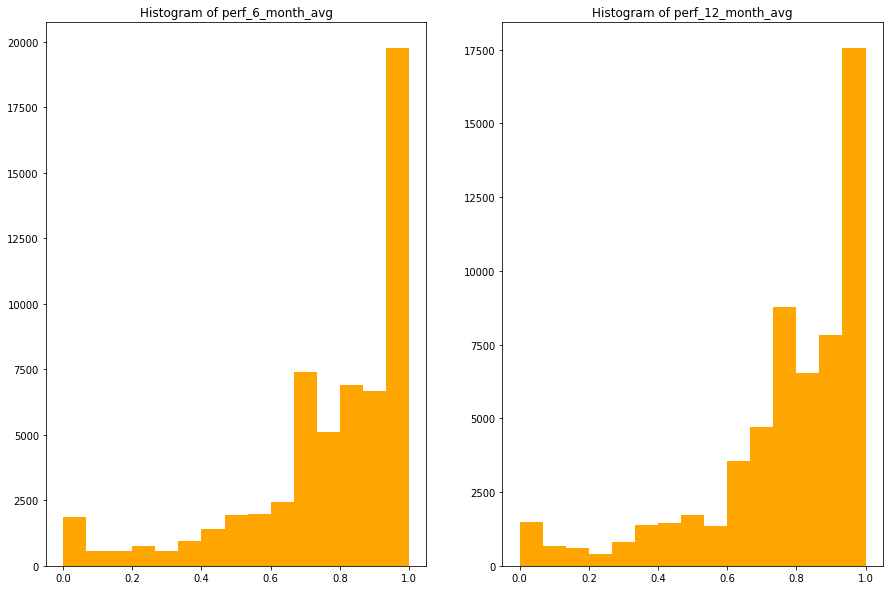

In [8]:
plt.figure(figsize = [15, 10])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.hist(x = df["perf_6_month_avg"], bins = 15 , color = "orange")
plt.title('Histogram of perf_6_month_avg')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.hist(x = df["perf_12_month_avg"], bins = 15 , color = "orange")
plt.title('Histogram of perf_12_month_avg')

plt.show()

### Insights : 

    * Both the features perf_6_month_avg and perf_12_month_avg distribution's are left skewed. 
    * Both the histograms are similar to each other. 
    * Most values lies in the range of 0.7 - 1 

In [10]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [11]:
## These 1 in the above features represent to their last row 

df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
58914,84165,11,8,0,0,0,0,2,6,17,26,6,0,0,0.54,0.64,0,1,0,0,1,0,0
58915,84166,0,8,0,4,5,7,2,3,4,5,0,0,0,0.76,0.77,0,0,0,0,1,0,1
58916,84167,0,2,0,1,1,1,0,0,0,0,0,0,0,0.09,0.06,0,0,0,0,1,0,1
58917,84169,6,4,0,0,0,0,0,0,0,0,0,0,0,0.77,0.80,0,1,0,0,1,0,0
58918,84171,0,12,0,50,50,50,0,0,0,0,0,0,50,0.63,0.63,0,1,0,0,1,0,0


### Converting categorical features to numerical features

## Data-Visualisation 

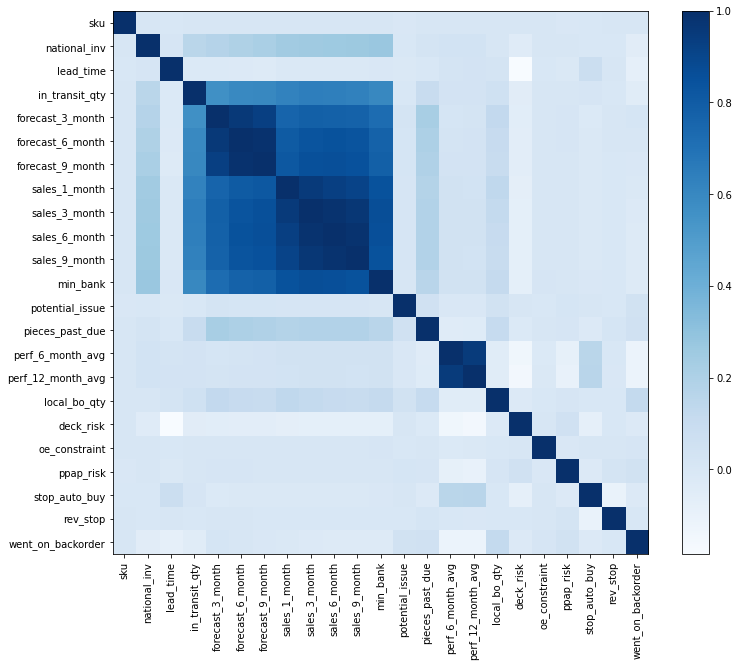

In [15]:
# Look at correlations between features and the label

# Set figure size 
fig = plt.figure(figsize=(12,10)) 

# Plot a correlation matrix
plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest', aspect='auto', alpha = 1)

# Display legend showing what the colours mean
plt.colorbar()

# Add tick marks and feature names for ease of reading
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)

# Show the plot
plt.show()

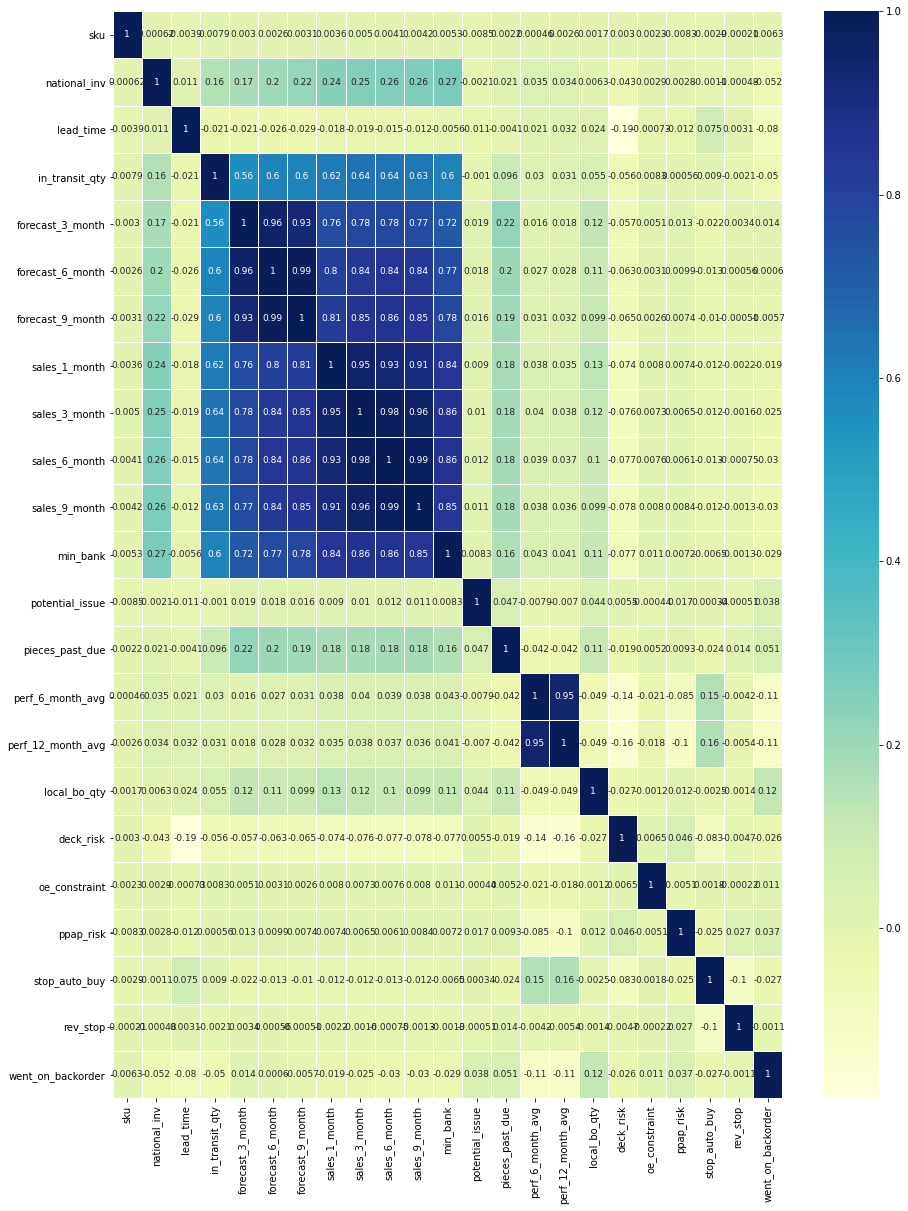

In [16]:
## Setting the size of the heatmap
plt.subplots(figsize = (15 , 20))

## plotting the heatmap
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu" ,linewidths = 0.5, annot_kws={"size": 9})

## Show the plot
plt.show()

### Insights :

    * The correlation matrix shows that the quantity in transit, the forecast sales over 3/6/9 months, the actual sales over the previous 1/3/6/9 months, and minimum recommended stock level are highly correlated. 

    * If the sales are high over the last 1/3/6/9 months, then it is reasonable for the forecast sales over the next 3/6/9 months to also be high. If forecast sales are high, then it would be useful to have more of the stock in hand and to have more shipped in.

    * Besides that, the average performance over the last 6 months strongly correlates with that over the last 12 months.

    * Overall, the correlation matrix suggests that the number of features used for predicting whether an item goes on back order can be lower than the number of features in the dataset. In other words, the dimensionality of the problem may be reduced.

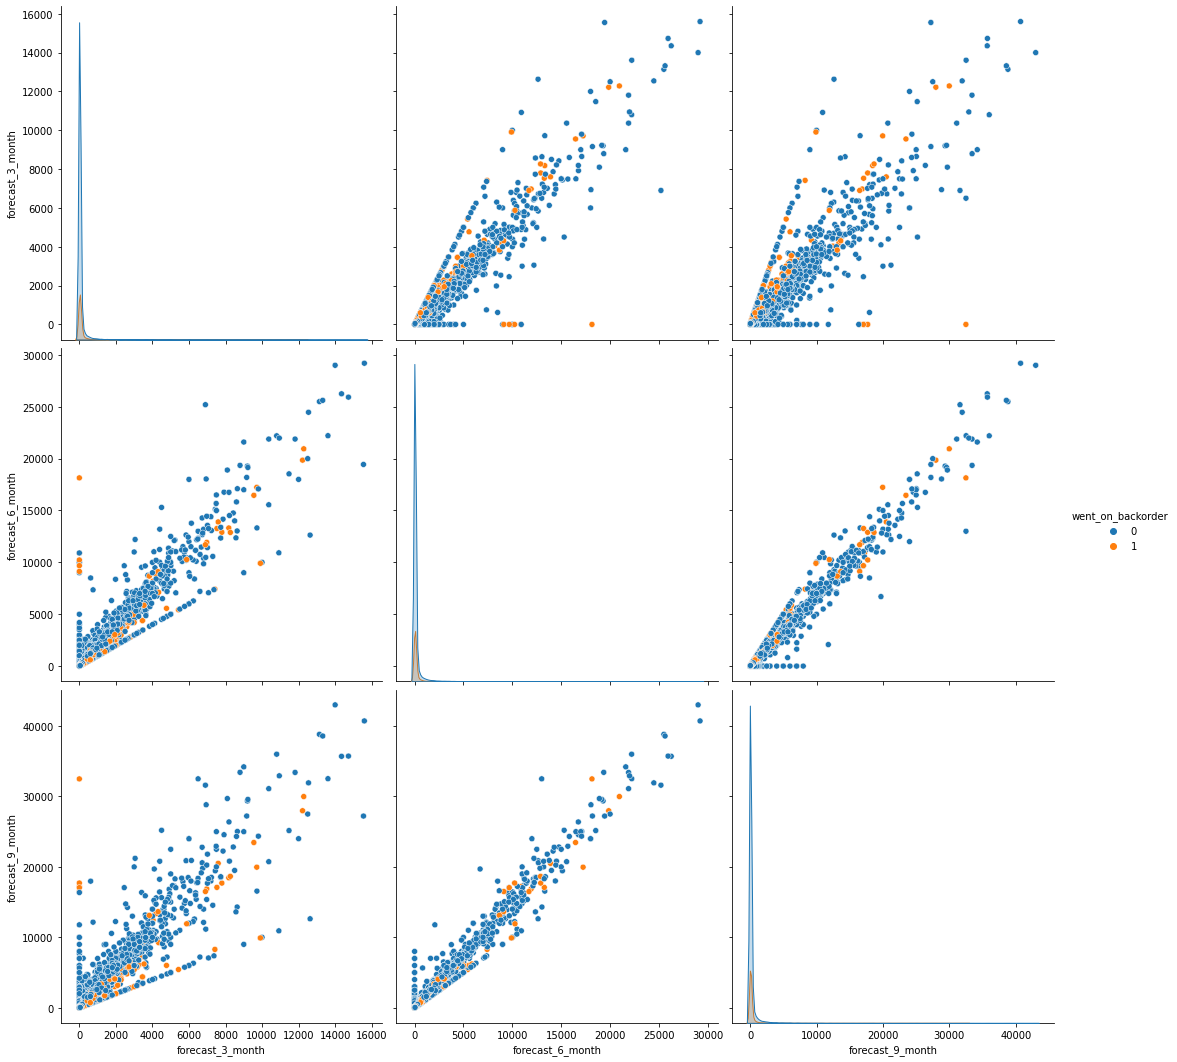

<Figure size 1440x864 with 0 Axes>

In [17]:
## Lets take a closer look on the forescast period.

# Forecast columns
forecasts = ['forecast_3_month','forecast_6_month', 'forecast_9_month']

# Pair-wise scatter plot for the forecasts (3, 6 and 9)
sns.pairplot(df, vars=forecasts, hue='went_on_backorder', size=5)

# Show the plot
fig = plt.figure(figsize = (20 , 12))
plt.show()

## Insights: 

    * The forecast values over each time frame have very close linear correlation with each other, as expected from the 
    correlation matrix. 
    * The forecast values cover a wide range from 0 to over 1 million.
    * Backorders only occur when the forecast value is low.

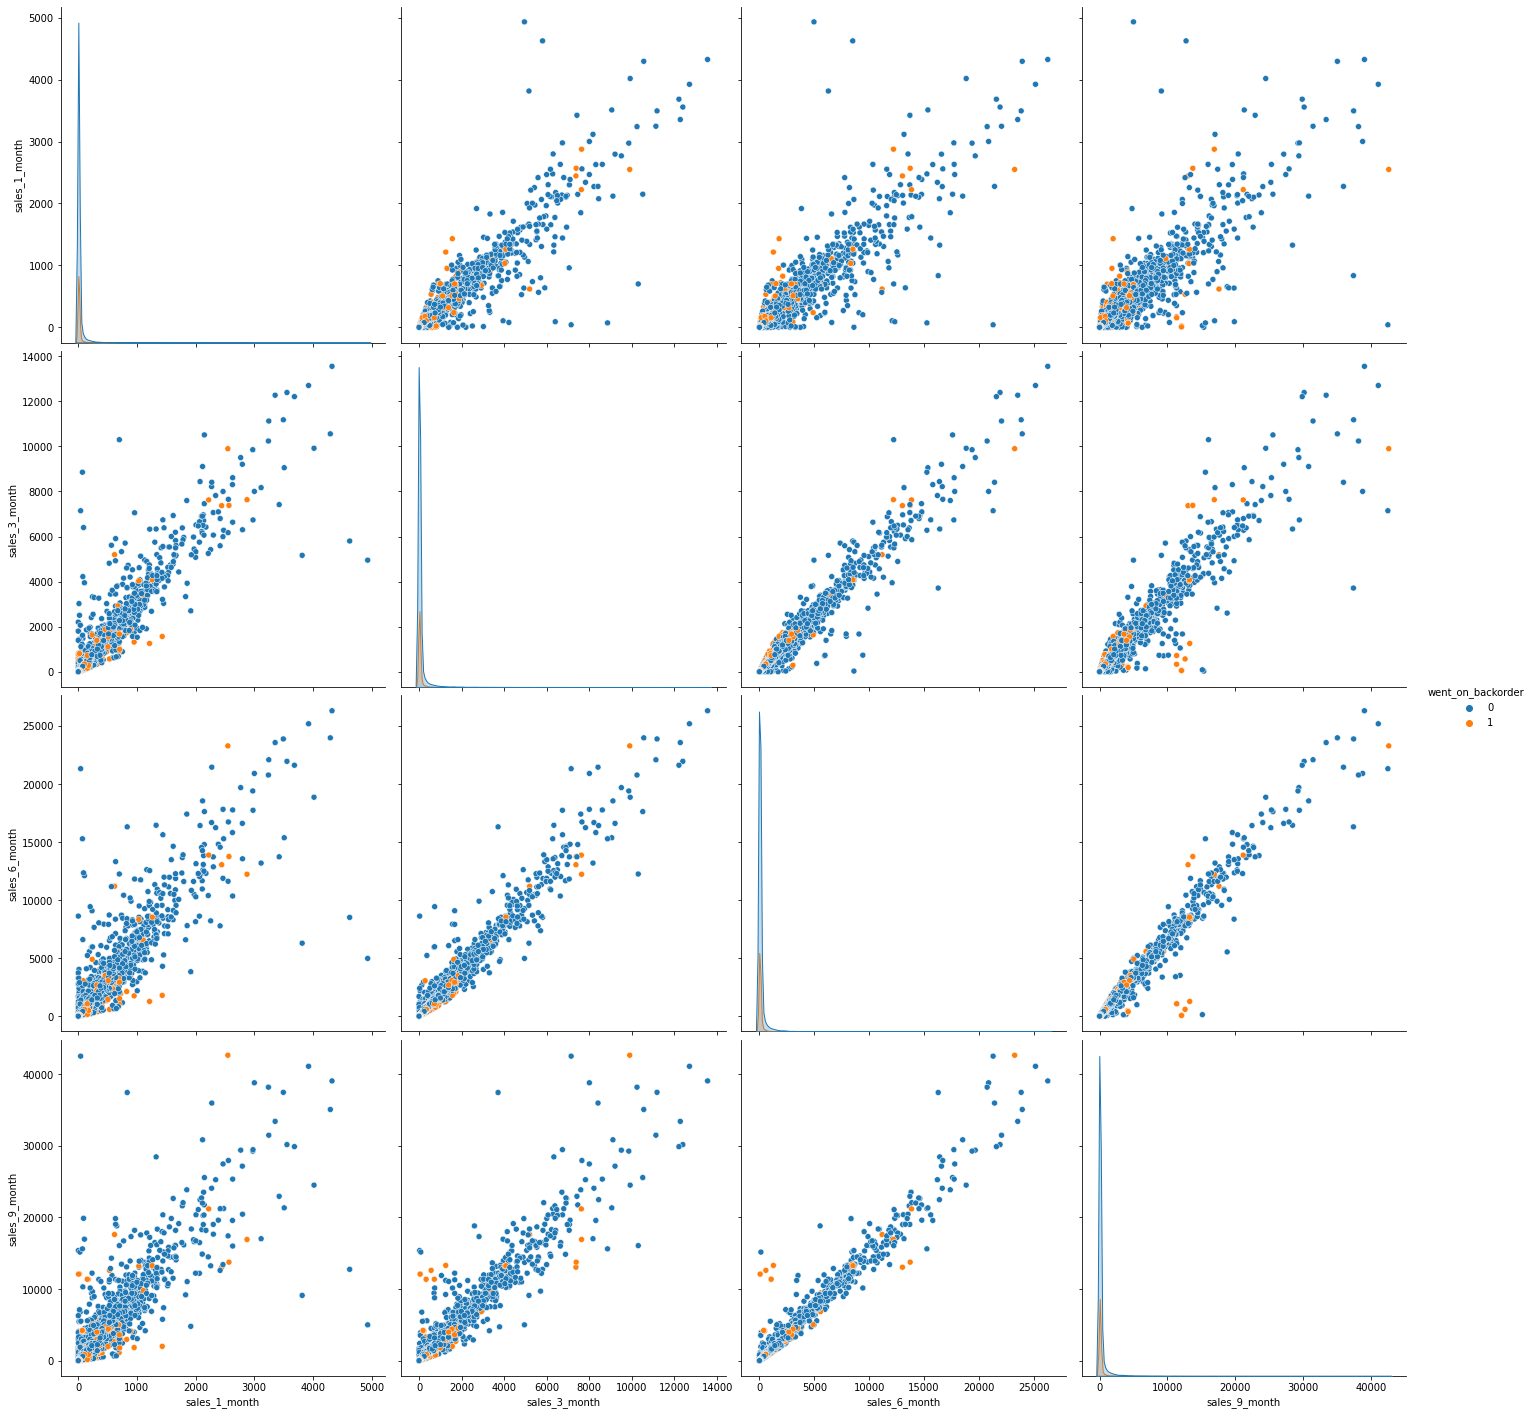

<Figure size 1440x864 with 0 Axes>

In [18]:
# Do a pair-wise scatter plot for sales

## Sales columns 
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']

## Pair-wise scatter plot for the respective sales months 
sns.pairplot(df, vars=sales, hue='went_on_backorder', size=5)

## Plot the figure
fig = plt.figure(figsize = (20 , 12))
plt.show()


## Insights :

    * The sales over each time frame have linear correlations with each other, as expected from the correlation matrix.
    * There are some instances when the sales at different time frames fall away from the linear correlation. 
    * The sales range from 0 to over 1 million. Backorders only occur when sales are low.

### Performing Re-indexing

In [19]:
cols = df.columns.tolist()
cols

['sku',
 'national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'potential_issue',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [20]:
cols.insert(20, cols.pop(cols.index('potential_issue')))  ## 20 is the destination index , potential_issue is ur feature
cols

['sku',
 'national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'potential_issue',
 'rev_stop',
 'went_on_backorder']

In [21]:
df = df.reindex(columns= cols)
df.head()

## Re-indexing is complete 

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,potential_issue,rev_stop,went_on_backorder
0,2,4,2,0,0,0,0,0,0,0,0,0,0,0.18,0.31,0,1,0,0,1,0,0,0
1,5,2,16,0,0,0,0,0,0,0,0,1,0,0.31,0.40,0,0,0,0,1,0,0,0
2,7,4,4,0,0,0,0,0,0,0,0,0,0,0.73,0.78,0,0,0,0,1,0,0,0
3,9,0,9,0,1,1,1,0,0,0,0,0,0,0.86,0.69,0,0,0,0,1,0,0,0
4,10,300,8,0,0,0,0,0,40,100,122,7,0,0.00,0.00,0,0,0,0,1,0,0,0


### Check the Outliers 

In [22]:
colors = ["#0101DF", "#DF0101"] ## color combination 

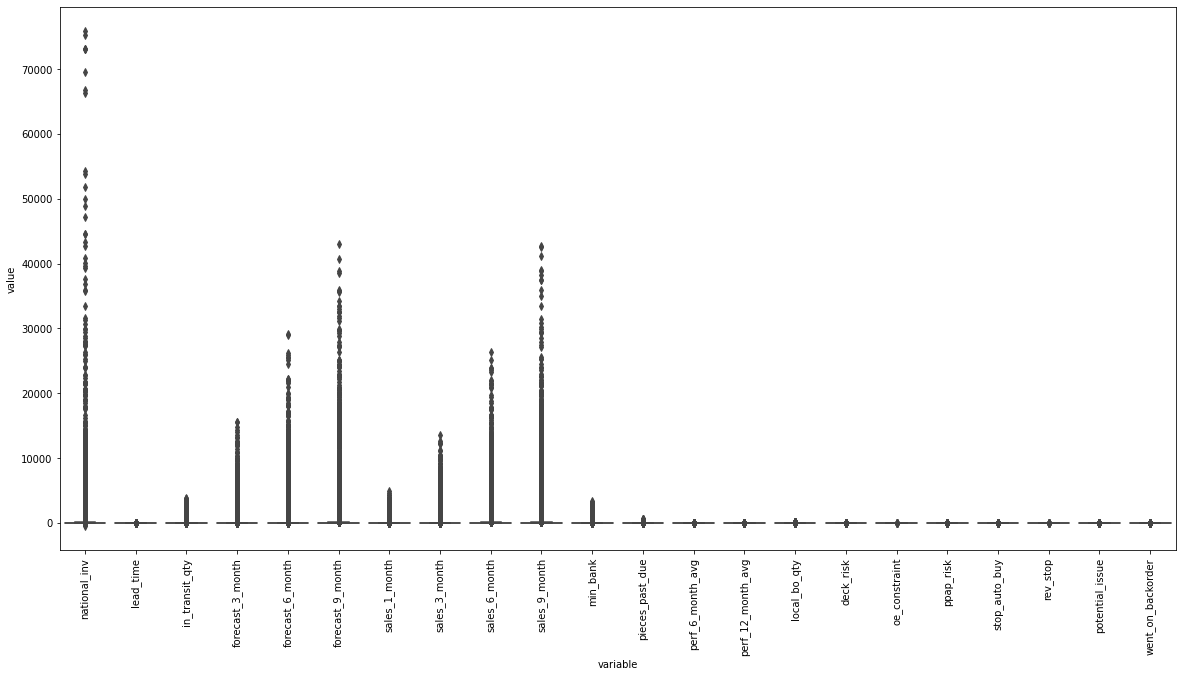

In [23]:
### Creating a Dataframe with all the features in it 

out = pd.DataFrame(data = df , columns = ['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'potential_issue',
 'went_on_backorder'])

## Setting the size of the Box-Plot
fig = plt.figure(figsize = (20 , 10))

## Creating the Box-Plot
sns.boxplot(x="variable", y="value", data=pd.melt(out))

## Rotating the features to 90 Degree
plt.xticks(rotation = 90)

## PLotting
plt.show()

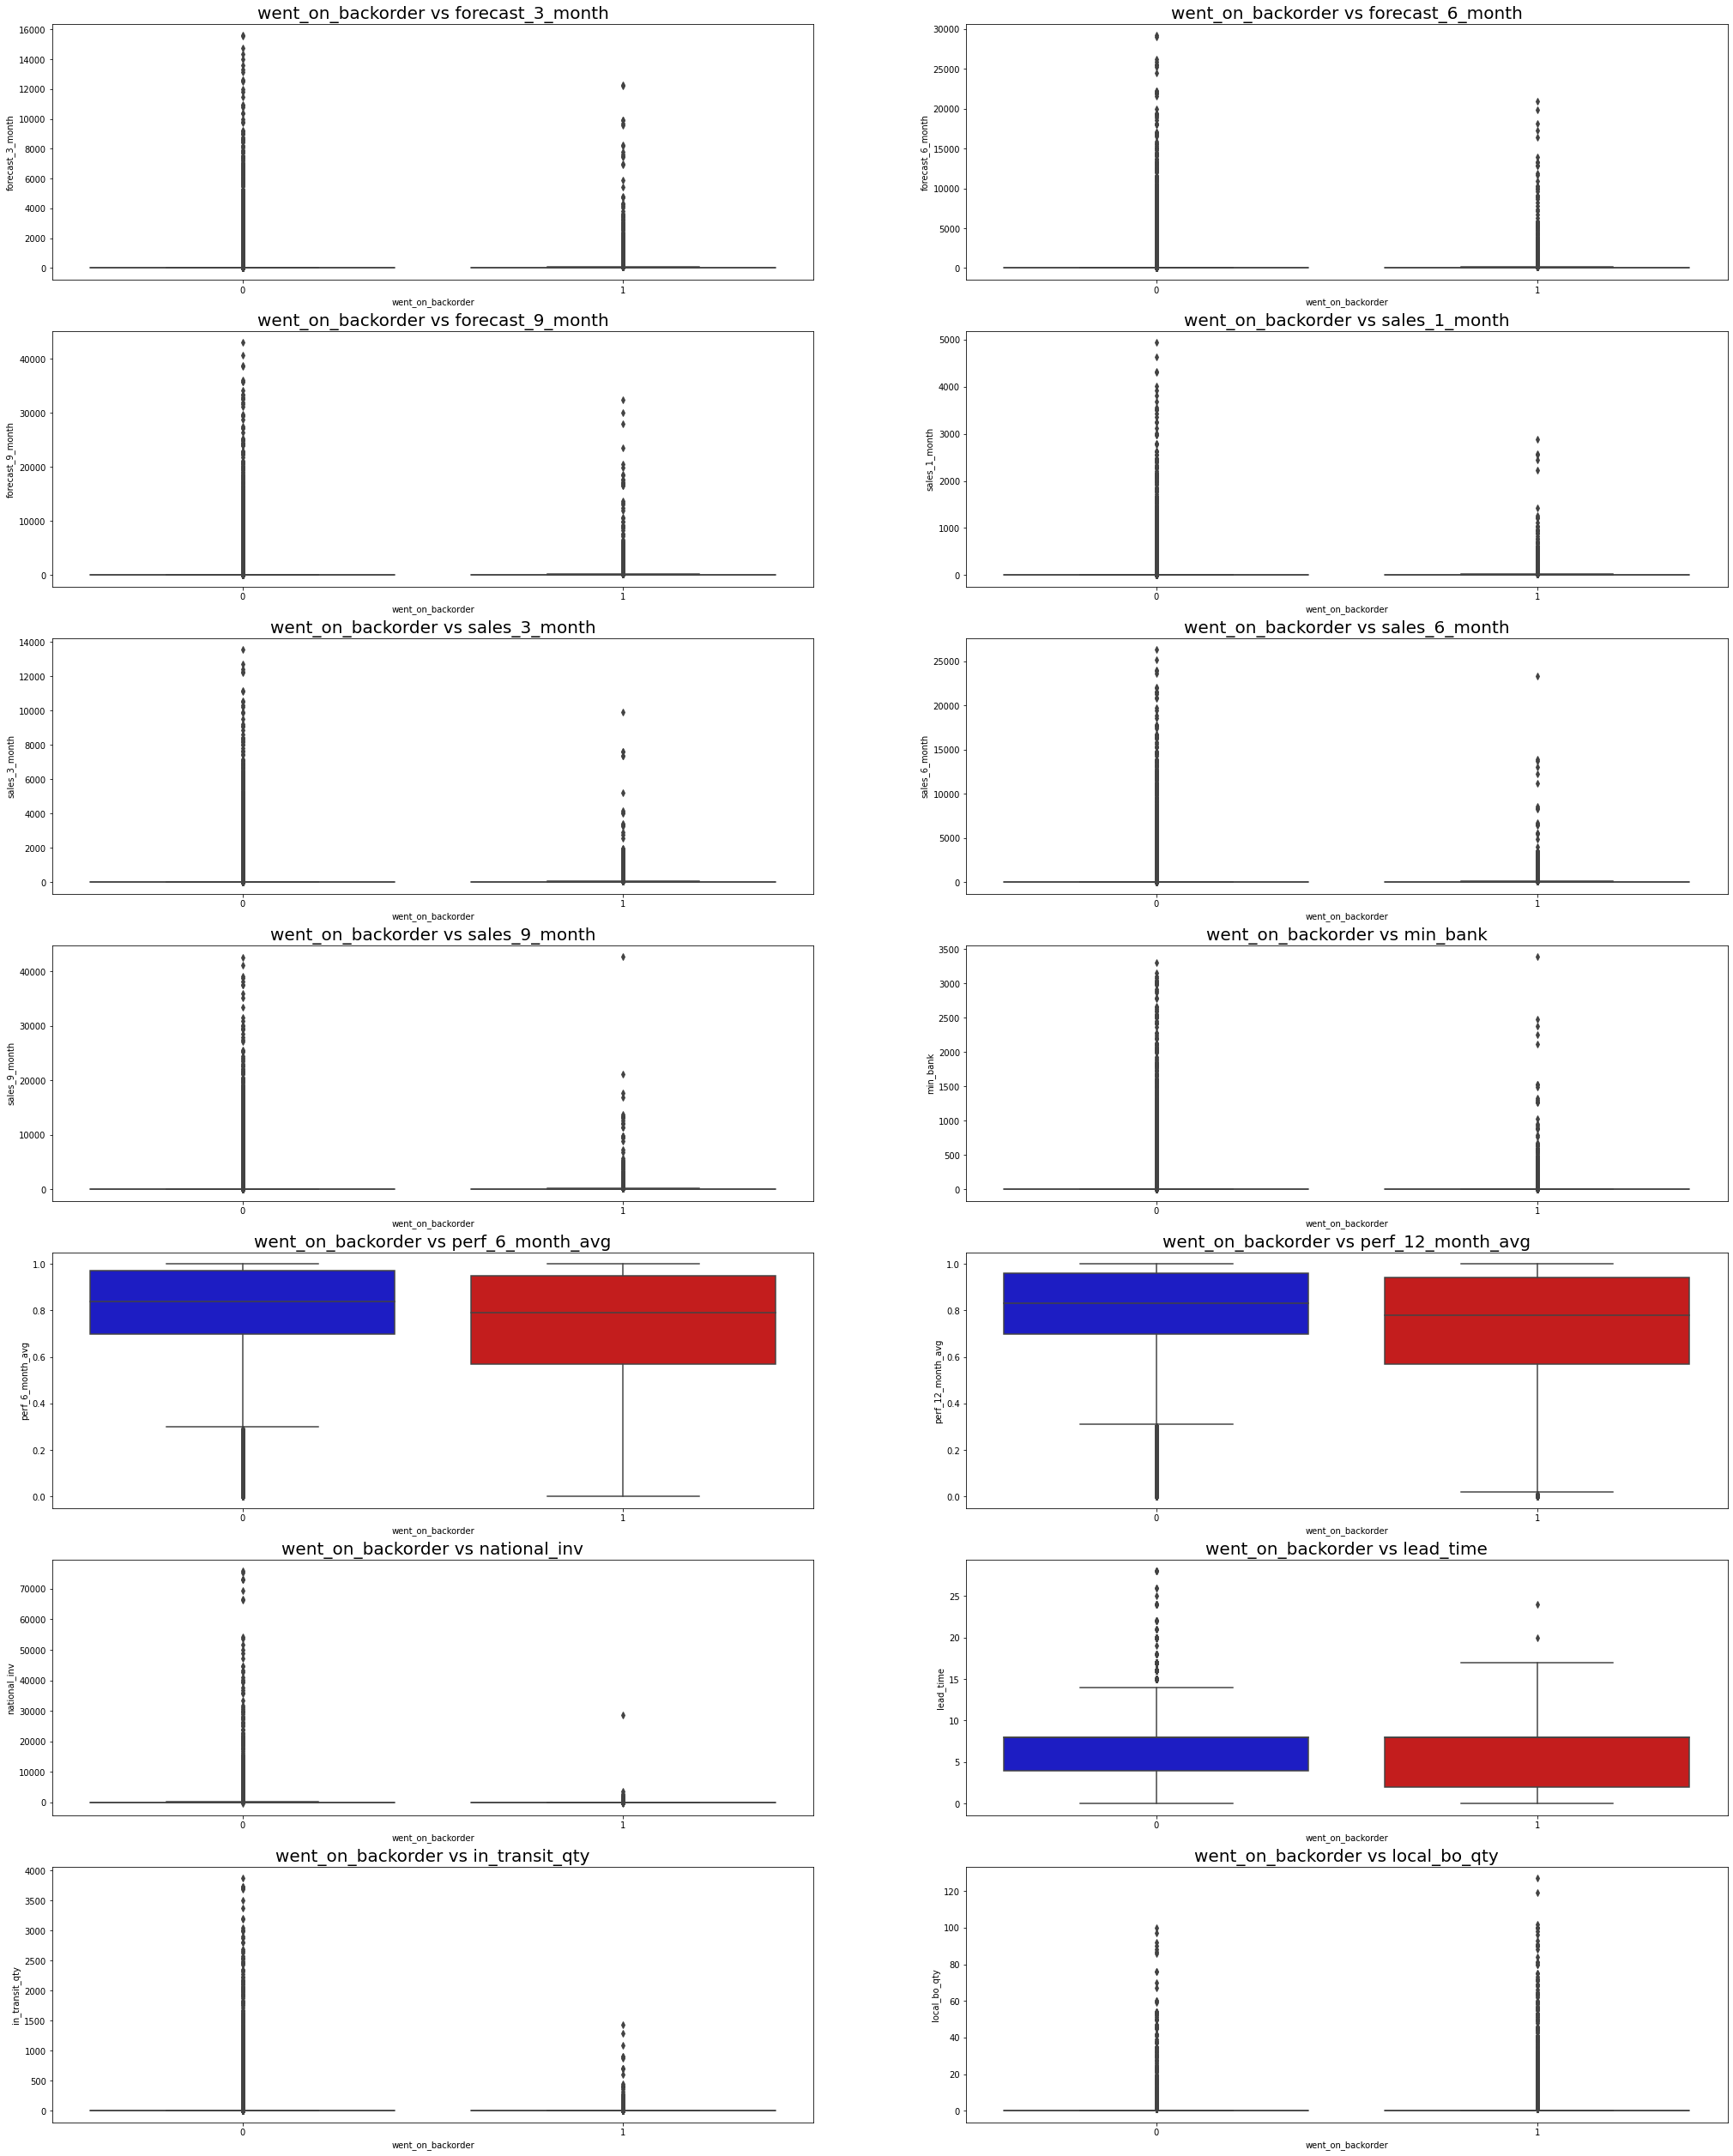

In [24]:
## Allocating the axis and the subplots 

f, axes = plt.subplots(7,2, figsize=(35,45))

## Creating the Boxplot for Every Feature with respect to "Went on Backorder"

sns.boxplot(x="went_on_backorder", y="forecast_3_month", data=df, palette=colors, ax=axes[0,0])
axes[0,0].set_title('went_on_backorder vs forecast_3_month' , fontsize= 20)
axes[0,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[0,0].set_ylabel('forecast_3_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="forecast_6_month", data=df, palette=colors, ax=axes[0,1])
axes[0,1].set_title('went_on_backorder vs forecast_6_month',fontsize= 20)
axes[0,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[0,1].set_ylabel('forecast_6_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="forecast_9_month", data=df, palette=colors, ax=axes[1,0])
axes[1,0].set_title('went_on_backorder vs forecast_9_month',fontsize= 20)
axes[1,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[1,0].set_ylabel('forecast_9_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_1_month", data=df, palette=colors, ax=axes[1,1])
axes[1,1].set_title('went_on_backorder vs sales_1_month',fontsize= 20)
axes[1,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[1,1].set_ylabel('sales_1_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_3_month", data=df, palette=colors, ax=axes[2,0])
axes[2,0].set_title('went_on_backorder vs sales_3_month',fontsize= 20)
axes[2,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[2,0].set_ylabel('sales_3_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_6_month", data=df, palette=colors, ax=axes[2,1])
axes[2,1].set_title('went_on_backorder vs sales_6_month',fontsize= 20)
axes[2,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[2,1].set_ylabel('sales_6_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_9_month", data=df, palette=colors, ax=axes[3,0])
axes[3,0].set_title('went_on_backorder vs sales_9_month',fontsize= 20)
axes[3,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[3,0].set_ylabel('sales_9_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="min_bank", data=df, palette=colors, ax=axes[3,1])
axes[3,1].set_title('went_on_backorder vs min_bank',fontsize= 20)
axes[3,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[3,1].set_ylabel('min_bank', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="perf_6_month_avg", data=df, palette=colors, ax=axes[4,0])
axes[4,0].set_title('went_on_backorder vs perf_6_month_avg',fontsize= 20)
axes[4,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[4,0].set_ylabel('perf_6_month_avg', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="perf_12_month_avg", data=df, palette=colors, ax=axes[4,1])
axes[4,1].set_title('went_on_backorder vs perf_12_month_avg',fontsize= 20)
axes[4,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[4,1].set_ylabel('perf_12_month_avg', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="national_inv", data=df, palette=colors, ax=axes[5,0])
axes[5,0].set_title('went_on_backorder vs national_inv',fontsize= 20)
axes[5,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[5,0].set_ylabel('national_inv', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="lead_time", data=df, palette=colors, ax=axes[5,1])
axes[5,1].set_title('went_on_backorder vs lead_time',fontsize= 20)
axes[5,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[5,1].set_ylabel('lead_time', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="in_transit_qty", data=df, palette=colors, ax=axes[6,0])
axes[6,0].set_title('went_on_backorder vs in_transit_qty',fontsize= 20)
axes[6,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[6,0].set_ylabel('in_transit_qty', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="local_bo_qty", data=df, palette=colors, ax=axes[6,1])
axes[6,1].set_title('went_on_backorder vs local_bo_qty',fontsize= 20)
axes[6,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[6,1].set_ylabel('local_bo_qty', fontsize = 10)

## PLotting 
plt.show()

## Insights:

    * when it comes to outliers, it plays an important role
    * The only question that ponders every one's mind is "Do we need to treat them or not?"
    * Apparently, the answer to the question depends on the dataset
    * These anamolies/outliers are usefull in this dataset, as it will help us to find out the products back order activity
    * There are plenty of outliers for every features with respect to target (went on backorder)
    * We will not be removing these outliers because each it may result in loss of data 
    * Besides we will using Tree based Algorithms or Ensemble Techniques to predict the backorder
    * The above mentioned algorithms are robust to outliers and skewness.

## Checking the Skewness of the data 

In [25]:
## Before checking the Skewness , we can drop the SKU from our dataset, as it depicts just the random product ID 

df1 = df.copy(deep = True)
df1.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,potential_issue,rev_stop,went_on_backorder
0,2,4,2,0,0,0,0,0,0,0,0,0,0,0.18,0.31,0,1,0,0,1,0,0,0
1,5,2,16,0,0,0,0,0,0,0,0,1,0,0.31,0.40,0,0,0,0,1,0,0,0
2,7,4,4,0,0,0,0,0,0,0,0,0,0,0.73,0.78,0,0,0,0,1,0,0,0
3,9,0,9,0,1,1,1,0,0,0,0,0,0,0.86,0.69,0,0,0,0,1,0,0,0
4,10,300,8,0,0,0,0,0,40,100,122,7,0,0.00,0.00,0,0,0,0,1,0,0,0


In [26]:
df1.drop(["sku"],1,inplace=True)

In [27]:
df1.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,potential_issue,rev_stop,went_on_backorder
0,4,2,0,0,0,0,0,0,0,0,0,0,0.18,0.31,0,1,0,0,1,0,0,0
1,2,16,0,0,0,0,0,0,0,0,1,0,0.31,0.40,0,0,0,0,1,0,0,0
2,4,4,0,0,0,0,0,0,0,0,0,0,0.73,0.78,0,0,0,0,1,0,0,0
3,0,9,0,1,1,1,0,0,0,0,0,0,0.86,0.69,0,0,0,0,1,0,0,0
4,300,8,0,0,0,0,0,40,100,122,7,0,0.00,0.00,0,0,0,0,1,0,0,0


In [28]:
### Now lets check the skewness of data 

df1.skew()

national_inv         26.218761
lead_time            -0.016861
in_transit_qty       15.376587
forecast_3_month     13.554719
forecast_6_month     13.435192
forecast_9_month     13.540964
sales_1_month        13.880489
sales_3_month        12.666195
sales_6_month        12.829744
sales_9_month        13.338128
min_bank             12.015635
pieces_past_due      25.479296
perf_6_month_avg     -1.504102
perf_12_month_avg    -1.527268
local_bo_qty         18.944509
deck_risk             1.661924
oe_constraint        73.167927
ppap_risk             2.325333
stop_auto_buy        -7.292987
potential_issue      31.031199
rev_stop             62.650885
went_on_backorder     1.877837
dtype: float64

### Lets Visualize it 

    Univariative Analysis on the features with Skewness and Kurtosis 

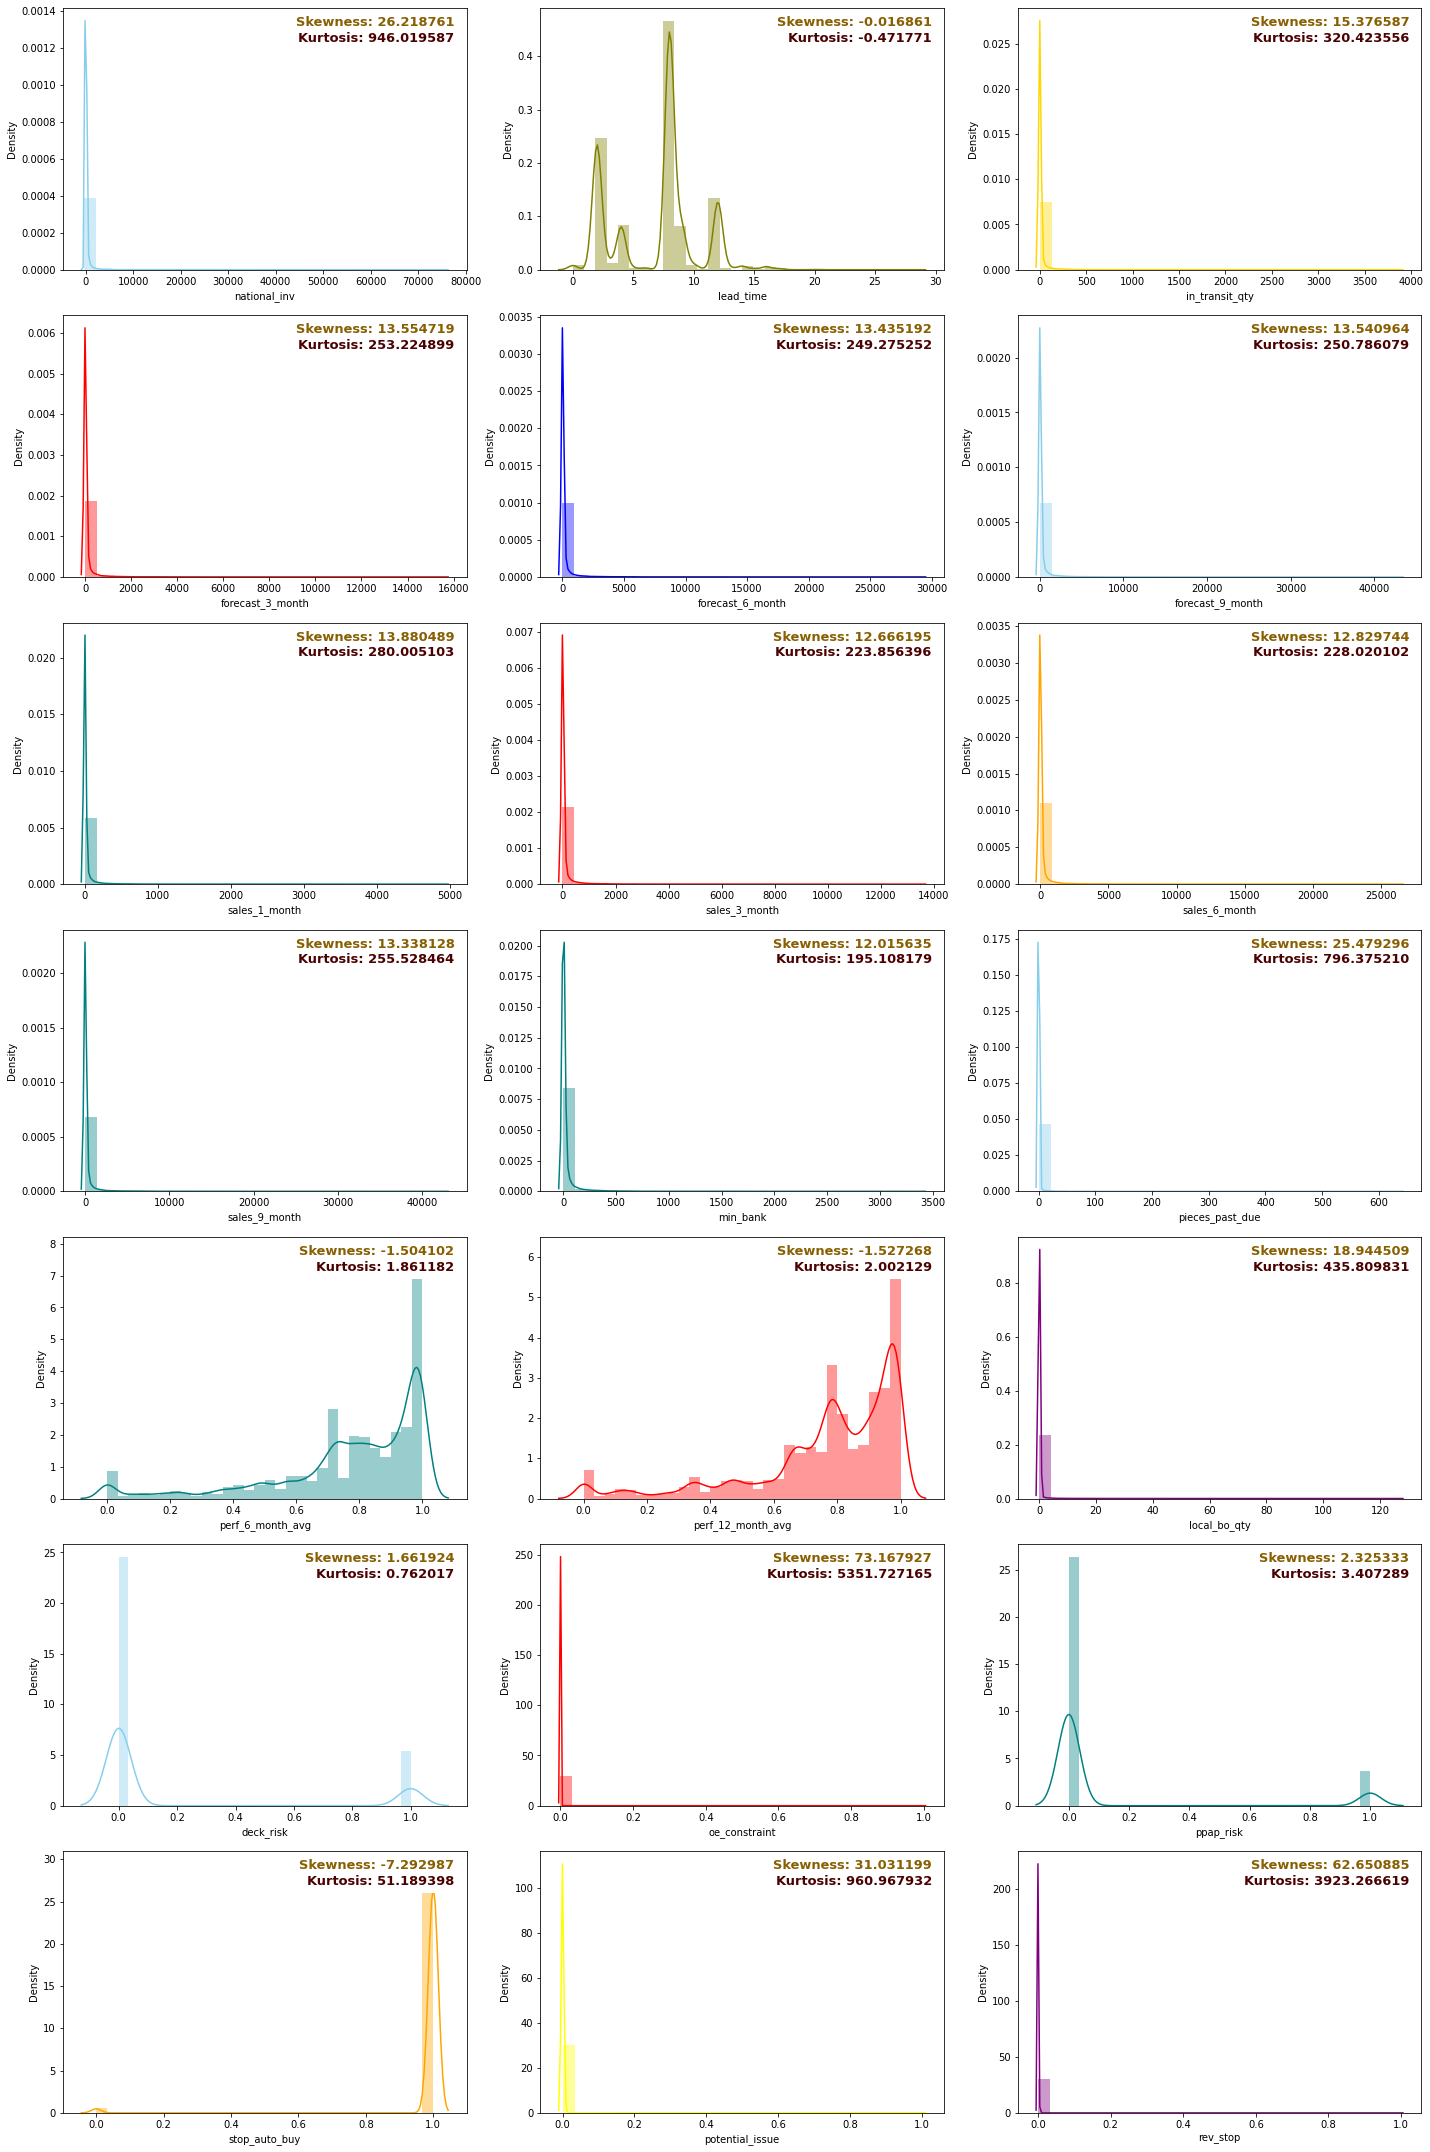

In [29]:
## Allocating the axis
f, axes = plt.subplots(7, 3, figsize=(20, 30))

## Univariate analysis using distplot
sns.distplot(df1.iloc[:,0], color="skyblue",bins = 30, ax=axes[0,0])
sns.distplot(df1.iloc[:,1], color="olive",bins = 30, ax=axes[0,1])
sns.distplot(df1.iloc[:,2], color="gold",bins = 30, ax=axes[0,2])
sns.distplot(df1.iloc[:,3], color="red",bins = 30, ax=axes[1,0])
sns.distplot(df1.iloc[:,4], color="blue",bins = 30, ax=axes[1,1])
sns.distplot(df1.iloc[:,5], color="skyblue",bins = 30, ax=axes[1,2])
sns.distplot(df1.iloc[:,6], color="teal",bins = 30, ax=axes[2,0])
sns.distplot(df1.iloc[:,7], color="red",bins = 30, ax=axes[2,1])
sns.distplot(df1.iloc[:,8], color="orange",bins = 30, ax=axes[2,2])
sns.distplot(df1.iloc[:,9], color="teal", bins = 30,ax=axes[3,0])
sns.distplot(df1.iloc[:,10], color="teal", bins = 30,ax=axes[3,1])
sns.distplot(df1.iloc[:,11], color="skyblue", bins = 30,ax=axes[3,2])
sns.distplot(df1.iloc[:,12], color="teal", bins = 30,ax=axes[4,0])
sns.distplot(df1.iloc[:,13], color="red", bins = 30,ax=axes[4,1])
sns.distplot(df1.iloc[:,14], color="purple",bins = 30, ax=axes[4,2])
sns.distplot(df1.iloc[:,15], color="skyblue",bins = 30, ax=axes[5,0])
sns.distplot(df1.iloc[:,16], color="red",bins = 30, ax=axes[5,1])
sns.distplot(df1.iloc[:,17], color="teal", bins = 30,ax=axes[5,2])
sns.distplot(df1.iloc[:,18], color="orange",bins = 30, ax=axes[6,0])
sns.distplot(df1.iloc[:,19], color="yellow", bins = 30,ax=axes[6,1])
sns.distplot(df1.iloc[:,20], color="purple", bins = 30,ax=axes[6,2])

## calculating the Skewness and Kurtosis for the features 
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df1.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=13, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df1.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=13, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood') 
    
## Plotting    
plt.tight_layout()

## Insights: 

    * The above graphical methods include the histogram and normality plot.
    * Skewness and Kurtosis are used to test the normality of a given dataset.
    * Apparently, skewness is not close to zero, then the dataset is not normally distributed.

## Checking the Imbalance of the Dataset 

In [30]:
df1.head(3)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,potential_issue,rev_stop,went_on_backorder
0,4,2,0,0,0,0,0,0,0,0,0,0,0.18,0.31,0,1,0,0,1,0,0,0
1,2,16,0,0,0,0,0,0,0,0,1,0,0.31,0.40,0,0,0,0,1,0,0,0
2,4,4,0,0,0,0,0,0,0,0,0,0,0.73,0.78,0,0,0,0,1,0,0,0


## Segregate the converted features (categorical to numerical)

In [31]:
cat_col = df1.loc[:,"deck_risk":"went_on_backorder"]
print(cat_col.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58919 entries, 0 to 58918
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   deck_risk          58919 non-null  int32
 1   oe_constraint      58919 non-null  int32
 2   ppap_risk          58919 non-null  int32
 3   stop_auto_buy      58919 non-null  int32
 4   potential_issue    58919 non-null  int32
 5   rev_stop           58919 non-null  int32
 6   went_on_backorder  58919 non-null  int32
dtypes: int32(7)
memory usage: 4.0 MB
None


## Segregate the numerical feature 

In [32]:
num_col = df1.loc[: , 'national_inv' : 'local_bo_qty']
print(num_col.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58919 entries, 0 to 58918
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   national_inv       58919 non-null  int64  
 1   lead_time          58919 non-null  int64  
 2   in_transit_qty     58919 non-null  int64  
 3   forecast_3_month   58919 non-null  int64  
 4   forecast_6_month   58919 non-null  int64  
 5   forecast_9_month   58919 non-null  int64  
 6   sales_1_month      58919 non-null  int64  
 7   sales_3_month      58919 non-null  int64  
 8   sales_6_month      58919 non-null  int64  
 9   sales_9_month      58919 non-null  int64  
 10  min_bank           58919 non-null  int64  
 11  pieces_past_due    58919 non-null  int64  
 12  perf_6_month_avg   58919 non-null  float64
 13  perf_12_month_avg  58919 non-null  float64
 14  local_bo_qty       58919 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 9.2 MB
None


## Checking the proportions in "cat_col" variable

In [33]:
for i in cat_col:
    count = cat_col[i].value_counts(normalize = True)
    print(i)
    print(count*100)

deck_risk
0    81.954887
1    18.045113
Name: deck_risk, dtype: float64
oe_constraint
0    99.98133
1     0.01867
Name: oe_constraint, dtype: float64
ppap_risk
0    87.907127
1    12.092873
Name: ppap_risk, dtype: float64
stop_auto_buy
1    98.21959
0     1.78041
Name: stop_auto_buy, dtype: float64
potential_issue
0    99.896468
1     0.103532
Name: potential_issue, dtype: float64
rev_stop
0    99.974541
1     0.025459
Name: rev_stop, dtype: float64
went_on_backorder
0    84.224104
1    15.775896
Name: went_on_backorder, dtype: float64


### Let's Visulaize it with respect to "went_on_backorder"

    1 - Back order 
    0 - Not Back order 

The feature is : deck_risk
Cross Tab for deck_risk and went on back order
went_on_backorder          0          1
deck_risk                              
0                  68.655272  13.299615
1                  15.568832   2.476281
AxesSubplot(0.125,0.125;0.775x0.755)


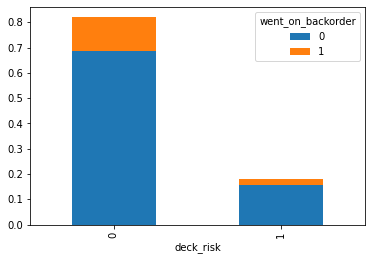

The feature is : oe_constraint
Cross Tab for oe_constraint and went on back order
went_on_backorder          0          1
oe_constraint                          
0                  84.213921  15.767409
1                   0.010183   0.008486
AxesSubplot(0.125,0.125;0.775x0.755)


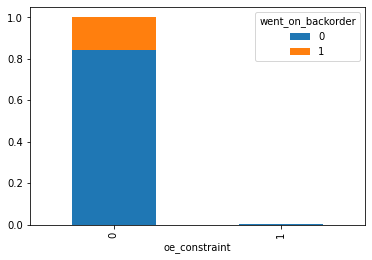

The feature is : ppap_risk
Cross Tab for ppap_risk and went on back order
went_on_backorder          0          1
ppap_risk                              
0                  74.483613  13.423514
1                   9.740491   2.352382
AxesSubplot(0.125,0.125;0.775x0.755)


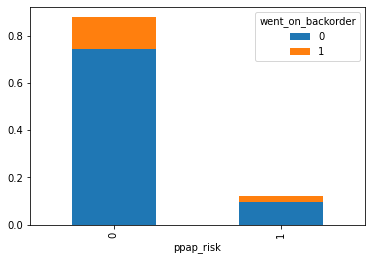

The feature is : stop_auto_buy
Cross Tab for stop_auto_buy and went on back order
went_on_backorder          0          1
stop_auto_buy                          
0                   1.371374   0.409036
1                  82.852730  15.366860
AxesSubplot(0.125,0.125;0.775x0.755)


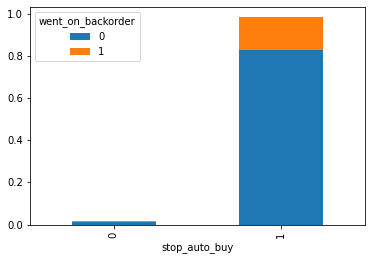

The feature is : potential_issue
Cross Tab for potential_issue and went on back order
went_on_backorder          0          1
potential_issue                        
0                  84.181673  15.714795
1                   0.042431   0.061101
AxesSubplot(0.125,0.125;0.775x0.755)


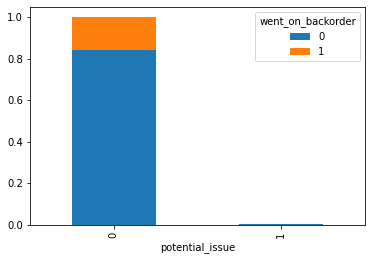

The feature is : rev_stop
Cross Tab for rev_stop and went on back order
went_on_backorder          0          1
rev_stop                               
0                  84.202040  15.772501
1                   0.022064   0.003394
AxesSubplot(0.125,0.125;0.775x0.755)


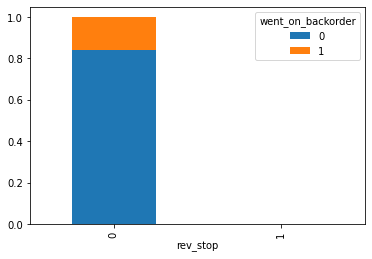

The feature is : went_on_backorder
Cross Tab for went_on_backorder and went on back order
went_on_backorder          0          1
went_on_backorder                      
0                  84.224104   0.000000
1                   0.000000  15.775896
AxesSubplot(0.125,0.125;0.775x0.755)


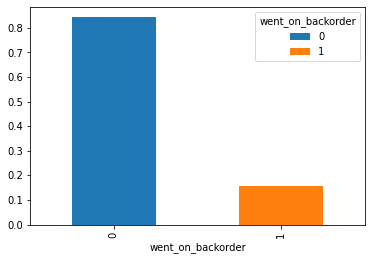

In [34]:
for i in cat_col:
    cross_tab = pd.crosstab(df[i], df['went_on_backorder'] , normalize = True)
    plotting = pd.crosstab(df[i], df['went_on_backorder'] , normalize = True ).plot.bar(stacked = True)
    print("The feature is :" , i)    
    print("Cross Tab for", i , "and went on back order")
    print(cross_tab*100)
    print(plotting)
    plt.show()

### Insights: 

    * As we can from the plots, there's a very few number of products that actually went to back order. 
    * This implies the data is extremely imbalanced
    * Using this imbalanced data, if we are to predict the backorder activity, the model will overfit
    * Hence it is recommended that the data has to be balanced before building the model.